# 10 Data aggregation & group operation

## 10.1 Groupby机制

In [1]:
import numpy as np
import pandas as pd
df=pd.DataFrame({'key1': ['a','a','b','b','a'],
                 'key2': ['one','two','one','two','one'],
                 'data1': np.random.randn(5),
                 'data2': np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.636400,0.144330
1,a,two,-0.984344,-0.512173
2,b,one,-1.108087,-0.275890
3,b,two,0.887123,-1.138298
4,a,one,0.178792,-0.150072


In [2]:
grouped=df['data1'].groupby(df['key1'])
grouped.mean()

key1
a   -0.480651
b   -0.110482
Name: data1, dtype: float64

In [3]:
means=df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.228804
      two    -0.984344
b     one    -1.108087
      two     0.887123
Name: data1, dtype: float64

In [4]:
means.unstack()

key2,one,two
key1,,
a,-0.228804,-0.984344
b,-1.108087,0.887123


In [5]:
states=['Ohio','California','California','Ohio','Ohio']
years=[2005,2005,2006,2005,2006]
df['data1'].groupby([states, years]).mean()

California  2005   -0.984344
            2006   -1.108087
Ohio        2005    0.125361
            2006    0.178792
Name: data1, dtype: float64

In [6]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.480651,-0.172639
b,-0.110482,-0.707094


In [7]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one  -0.228804 -0.002871
     two  -0.984344 -0.512173
b    one  -1.108087 -0.275890
     two   0.887123 -1.138298

In [8]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### 10.1.1 对分组进行迭代

In [9]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.636400  0.144330
1    a  two -0.984344 -0.512173
4    a  one  0.178792 -0.150072
b
  key1 key2     data1     data2
2    b  one -1.108087 -0.275890
3    b  two  0.887123 -1.138298


In [10]:
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.636400  0.144330
4    a  one  0.178792 -0.150072
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.984344 -0.512173
('b', 'one')
  key1 key2     data1    data2
2    b  one -1.108087 -0.27589
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.887123 -1.138298


In [11]:
pieces=dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,-1.108087,-0.275890
3,b,two,0.887123,-1.138298


In [12]:
list(df.groupby('key1'))

[('a',   key1 key2     data1     data2
  0    a  one -0.636400  0.144330
  1    a  two -0.984344 -0.512173
  4    a  one  0.178792 -0.150072), ('b',   key1 key2     data1     data2
  2    b  one -1.108087 -0.275890
  3    b  two  0.887123 -1.138298)]

In [13]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [14]:
grouped=df.groupby(df.dtypes, axis=1)
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.636400  0.144330
1 -0.984344 -0.512173
2 -1.108087 -0.275890
3  0.887123 -1.138298
4  0.178792 -0.150072
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### 10.1.2 选取一列或列的子集

In [15]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.002871
     two  -0.512173
b    one  -0.275890
     two  -1.138298

In [16]:
s_grouped=df.groupby(['key1','key2'])['data2']
s_grouped.mean()

key1  key2
a     one    -0.002871
      two    -0.512173
b     one    -0.275890
      two    -1.138298
Name: data2, dtype: float64

In [17]:
for (k1, k2), group in s_grouped:
    print((k1,k2))
    print(group)

('a', 'one')
0    0.144330
4   -0.150072
Name: data2, dtype: float64
('a', 'two')
1   -0.512173
Name: data2, dtype: float64
('b', 'one')
2   -0.27589
Name: data2, dtype: float64
('b', 'two')
3   -1.138298
Name: data2, dtype: float64


### 10.1.3 通过字典或Series进行分组

In [18]:
import numpy as np
people=pd.DataFrame(np.random.randn(5,5),
                    columns=list('abcde'),
                    index=['Joe','Steve','Wes','Jim','Travis'])
people.iloc[2:3, [1,2]]=np.nan
people

,a,b,c,d,e
Joe,-0.819387,1.987171,0.899279,-1.089374,0.128480
Steve,1.815817,3.090051,-1.265375,0.382909,-0.056674
Wes,-0.727191,NaN,NaN,-1.453937,0.580626
Jim,1.426270,-0.490503,-0.943366,-0.316710,-0.189554
Travis,0.000968,1.875704,1.314951,-1.207501,1.789084


In [19]:
mapping={'a':'red', 'b':'red', 'c':'blue',
         'd':'blue', 'e':'red', 'f':'orange'}
by_column=people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,-0.190095,1.296264
Steve,-0.882466,4.849194
Wes,-1.453937,-0.146566
Jim,-1.260076,0.746213
Travis,0.107450,3.665756


In [20]:
map_series=pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [21]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 10.1.4 通过函数进行分组

In [22]:
for length, group in people.groupby(len):
    print(length)
    print(group)

3
            a         b         c         d         e
Joe -0.819387  1.987171  0.899279 -1.089374  0.128480
Wes -0.727191       NaN       NaN -1.453937  0.580626
Jim  1.426270 -0.490503 -0.943366 -0.316710 -0.189554
5
              a         b         c         d         e
Steve  1.815817  3.090051 -1.265375  0.382909 -0.056674
6
               a         b         c         d         e
Travis  0.000968  1.875704  1.314951 -1.207501  1.789084


In [23]:
people.groupby(len).sum()

,a,b,c,d,e
3,-0.120308,1.496668,-0.044087,-2.860021,0.519551
5,1.815817,3.090051,-1.265375,0.382909,-0.056674
6,0.000968,1.875704,1.314951,-1.207501,1.789084


In [24]:
key_list=['one']*3+['two']*2
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.819387  1.987171  0.899279 -1.453937  0.128480
  two  1.426270 -0.490503 -0.943366 -0.316710 -0.189554
5 one  1.815817  3.090051 -1.265375  0.382909 -0.056674
6 two  0.000968  1.875704  1.314951 -1.207501  1.789084

In [25]:
for (k1,k2),group in people.groupby([len, key_list]):
    print((k1,k2))
    print(group)

(3, 'one')
            a         b         c         d         e
Joe -0.819387  1.987171  0.899279 -1.089374  0.128480
Wes -0.727191       NaN       NaN -1.453937  0.580626
(3, 'two')
           a         b         c        d         e
Jim  1.42627 -0.490503 -0.943366 -0.31671 -0.189554
(5, 'one')
              a         b         c         d         e
Steve  1.815817  3.090051 -1.265375  0.382909 -0.056674
(6, 'two')
               a         b         c         d         e
Travis  0.000968  1.875704  1.314951 -1.207501  1.789084


### 10.1.5 根据索引级别分组

In [26]:
columns=pd.MultiIndex.from_arrays([['US']*3+['JP']*2,
                                   [1,3,5,1,3]],
                                  names=['cty','tenor'])
hier_df=pd.DataFrame(np.random.randn(4,5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.239629 -0.305785 -0.419831 -0.929304  0.792127
1     -0.954533 -0.778327 -1.240888 -1.235276  0.698568
2      0.149576  0.193864  0.361019 -0.120687 -0.067029
3     -0.765443  0.385010  1.434515 -1.441000 -0.168156

In [27]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [28]:
hier_df.groupby(level='cty', axis=1).size()

cty
JP    2
US    3
dtype: int64

## 10.2 数据聚合

In [29]:
df

,key1,key2,data1,data2
0,a,one,-0.636400,0.144330
1,a,two,-0.984344,-0.512173
2,b,one,-1.108087,-0.275890
3,b,two,0.887123,-1.138298
4,a,one,0.178792,-0.150072


In [30]:
grouped=df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.015754
b    0.687602
Name: data1, dtype: float64

In [31]:
grouped.agg(lambda x: x.max()-x.min())

,data1,data2
key1,,
a,1.163136,0.656503
b,1.995210,0.862408


In [32]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.480651  0.597005 -0.984344 -0.810372 -0.636400 -0.228804   
b      2.0 -0.110482  1.410827 -1.108087 -0.609285 -0.110482  0.388320   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.178792   3.0 -0.172639  0.328833 -0.512173 -0.331123 -0.150072   
b     0.887123   2.0 -0.707094  0.609814 -1.138298 -0.922696 -0.707094   

                         
           75%      max  
key1                     
a    -0.002871  0.14433  
b    -0.491492 -0.27589

### 10.2.1 面向列的多函数应用

In [33]:
tips=pd.read_csv(r"D:\Github\pydata-book\examples\tips.csv")
tips['tip_pct']=tips['tip']/tips['total_bill']
tips[-5:]

,total_bill,tip,smoker,day,time,size,tip_pct
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204
243,18.78,3.00,No,Thur,Dinner,2,0.159744


In [34]:
grouped=tips.groupby(['day', 'smoker'])
grouped_pct=grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [35]:
grouped_pct.agg(['mean', 'std', lambda x:x.max()-x.min()])

mean       std  <lambda>
day  smoker                              
Fri  No      0.151650  0.028123  0.067349
     Yes     0.174783  0.051293  0.159925
Sat  No      0.158048  0.039767  0.235193
     Yes     0.147906  0.061375  0.290095
Sun  No      0.160113  0.042347  0.193226
     Yes     0.187250  0.154134  0.644685
Thur No      0.160298  0.038774  0.193350
     Yes     0.163863  0.039389  0.151240

In [36]:
grouped_pct.agg([('foo','mean'), ('bar', 'std')])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [37]:
grouped_pct.agg({'foo':'mean'})

C:\Users\liudonghang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


foo
day  smoker          
Fri  No      0.151650
     Yes     0.174783
Sat  No      0.158048
     Yes     0.147906
Sun  No      0.160113
     Yes     0.187250
Thur No      0.160298
     Yes     0.163863

In [38]:
functions=['count', 'mean', 'max']
result=grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [39]:
grouped['tip_pct'].agg(['count','size'])

count  size
day  smoker             
Fri  No          4     4
     Yes        15    15
Sat  No         45    45
     Yes        42    42
Sun  No         57    57
     Yes        19    19
Thur No         45    45
     Yes        17    17

In [40]:
ftuples=[('Durchschnitt','mean'), ('Abweichung', 'var')]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [41]:
grouped.agg({'tip_pct':['min','max','mean','std'],
             'size':'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### 10.2.2 以"没有索引"的形式返回聚合数据

In [42]:
tips.groupby(['day','smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## 10.3 apply:一般性的拆分-应用-合并

In [43]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [44]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [45]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [46]:
result=tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [47]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

### 10.3.1 禁止分组键

In [48]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


### 10.3.2 分位数和桶分析

In [49]:
frame=pd.DataFrame({'data1':np.random.randn(1000),
                    'data2':np.random.randn(1000)})
quantiles=pd.cut(frame.data1, 4)
quantiles[:10]

0     (-0.361, 1.359]
1     (-0.361, 1.359]
2     (-0.361, 1.359]
3     (-0.361, 1.359]
4      (1.359, 3.079]
5     (-0.361, 1.359]
6    (-2.081, -0.361]
7     (-0.361, 1.359]
8     (-0.361, 1.359]
9    (-3.807, -2.081]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.807, -2.081] < (-2.081, -0.361] < (-0.361, 1.359] < (1.359, 3.079]]

In [50]:
def get_stats(group):
    return {'min':group.min(), 'max':group.max(),
            'count':group.count(), 'mean':group.mean()}

In [51]:
grouped=frame.data2.groupby(quantiles)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.807, -2.081]",23.0,1.875126,-0.027197,-2.045450
"(-2.081, -0.361]",318.0,2.863454,-0.059664,-2.756384
"(-0.361, 1.359]",566.0,3.644426,0.067867,-2.885952
"(1.359, 3.079]",93.0,3.140927,-0.046422,-2.943558


In [52]:
grouping=pd.qcut(frame.data1, 10, labels=False)
grouped=frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.140911,0.034676,-2.443357
1,100.0,2.268891,-0.059355,-2.756384
2,100.0,2.863454,-0.118732,-2.729740
3,100.0,2.465815,-0.006195,-2.333827
4,100.0,3.644426,0.031206,-2.885952
5,100.0,3.265478,-0.055649,-2.083014
6,100.0,2.794335,0.115500,-2.701661
7,100.0,3.179236,0.088469,-1.770636
8,100.0,2.248646,0.108411,-2.471198


### 10.3.3 用特定于分组的值填充缺失值

In [53]:
s=pd.Series(np.random.randn(6))
s[::2]=np.nan
s

0         NaN
1   -0.933068
2         NaN
3    1.615762
4         NaN
5   -0.464166
dtype: float64

In [54]:
s.fillna(s.mean())

0    0.072843
1   -0.933068
2    0.072843
3    1.615762
4    0.072843
5   -0.464166
dtype: float64

In [55]:
states=['Ohio','New York','Vermont','Florida',
        'Oregon','Nevada','California','Idaho']
group_key=['East']*4+['West']*4
data=pd.Series(np.random.randn(8), index=states)
data

Ohio          0.107038
New York      0.234606
Vermont      -0.731023
Florida      -0.504891
Oregon        0.471839
Nevada       -0.383605
California   -0.827714
Idaho         1.494009
dtype: float64

In [56]:
data[['Vermont','Nevada','Idaho']]=np.nan
data.groupby(group_key).mean()

East   -0.054416
West   -0.177938
dtype: float64

In [57]:
fill_mean=lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.107038
New York      0.234606
Vermont      -0.054416
Florida      -0.504891
Oregon        0.471839
Nevada       -0.177938
California   -0.827714
Idaho        -0.177938
dtype: float64

In [58]:
fill_values={'East':0.5, 'West':-1}
fill_func=lambda g:g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.107038
New York      0.234606
Vermont       0.500000
Florida      -0.504891
Oregon        0.471839
Nevada       -1.000000
California   -0.827714
Idaho        -1.000000
dtype: float64

### 10.3.4 随机采样和排列

In [59]:
suits=['H','S','C','D']
card_val=(list(range(1,11))+[10]*3)*4
base_names=['A']+list(range(2,11))+['J','K','Q']
cards=[]
for suit in suits:
    cards.extend( str(num)+suit for num in base_names)

deck=pd.Series(card_val, index=cards)
deck.head()

AH    1
2H    2
3H    3
4H    4
5H    5
dtype: int64

In [62]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

3S      3
KC     10
8D      8
10D    10
QD     10
dtype: int64

In [63]:
get_suit=lambda card:card[-1]
deck.groupby(get_suit).apply(draw, n=2)

C  9C     9
   2C     2
D  KD    10
   4D     4
H  8H     8
   KH    10
S  8S     8
   7S     7
dtype: int64

In [65]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

KC    10
AC     1
2D     2
KD    10
7H     7
QH    10
AS     1
3S     3
dtype: int64

### 10.3.5 分组和加权平均数

In [66]:
df= pd.DataFrame({'category': ['a']*4+['b']*4,
                  'data':np.random.randn(8),
                  'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.875563,0.768226
1,a,0.398280,0.223301
2,a,0.391491,0.298972
3,a,0.381257,0.457497
4,b,-0.481283,0.962713
5,b,-1.480461,0.256851
6,b,2.253843,0.301198
7,b,1.592614,0.245581


In [67]:
grouped=df.groupby('category')
get_wavg=lambda g:np.average(g.data, weights=g.weights)
grouped.apply(get_wavg)

category
a    0.602424
b    0.128160
dtype: float64

In [68]:
close_px=pd.read_csv(r"D:\Github\pydata-book\examples\stock_px_2.csv",
                     parse_dates=True,index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [69]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [72]:
rets=close_px.pct_change().dropna()
rets[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974
2011-10-14,0.033225,0.003311,0.022784,0.017380


In [73]:
get_year=lambda x:x.year
spx_corr=lambda x:x.corrwith(x.SPX)
rets.groupby(get_year).apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [74]:
rets.groupby(get_year).apply(lambda x:x.AAPL.corr(x.MSFT))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### 10.3.6 组级别的线性回归

In [76]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y=data[yvar]
    X=data[xvars]
    X['intercept']=1
    result=sm.OLS(Y, X).fit()
    return result.params

In [77]:
close_px.groupby(get_year).apply(regress, yvar='AAPL', xvars=['SPX'])

,SPX,intercept
2003,0.018506,-8.589850
2004,0.132565,-132.121163
2005,0.286831,-299.595103
2006,0.155668,-133.186913
2007,0.379906,-432.917550
2008,0.146157,-36.338143
2009,0.328253,-164.384872
2010,0.412900,-210.849814
2011,-0.193834,603.876911


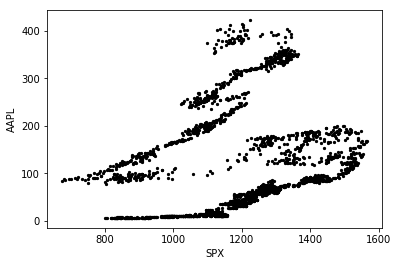

In [98]:
close_px.plot.scatter('SPX','AAPL',c='black', marker='.')